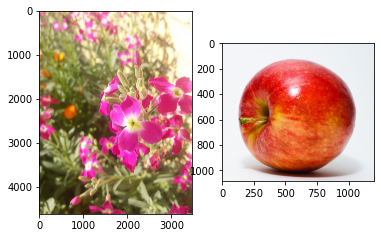

In [18]:
import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

# lets find the images 
address = os.listdir(".")
images = []
for file in address:
    if file.endswith(".jpg"):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

# show the images 

# just a copy for not using main files
background = np.copy(images[0])
appleimage = np.copy(images[1])

plt.subplot(1,2,1)
plt.imshow(background)
plt.subplot(1,2,2)
plt.imshow(appleimage)
plt.show()

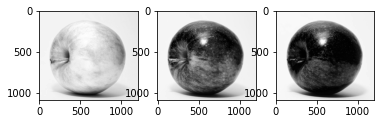

In [19]:
# show image of apple with each channel
r = appleimage[:,:,0]
g = appleimage[:,:,1]
b = appleimage[:,:,2]

plt.subplot(1,3,1)
plt.imshow(r,cmap= "gray")
plt.subplot(1,3,2)
plt.imshow(g,cmap= "gray")
plt.subplot(1,3,3)
plt.imshow(b,cmap= "gray")

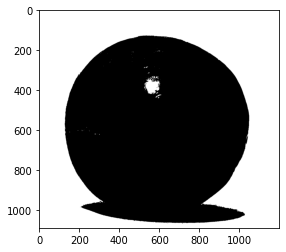

In [36]:
# define range to get mask
upper = np.array([255,255,255])
lower = np.array([0,10,200])

# get mask
mask = cv2.inRange(appleimage, lower, upper)
plt.imshow(mask,cmap= "gray")

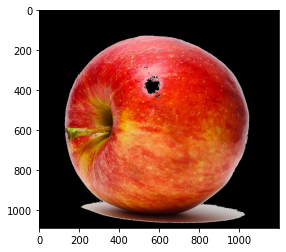

In [32]:
# get the mask of the apple
appleimagec = np.copy(appleimage)
appleimagec[mask != 0] = [0,0,0]
plt.imshow(appleimagec)

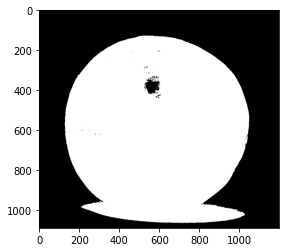

In [61]:
# get inverted mask
plt.imshow(cv2.bitwise_not(mask) , cmap= "gray" )

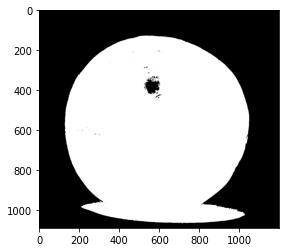

In [64]:
#  inverted RGB mask
invert_mask = np.repeat(cv2.bitwise_not(mask)[:,:,np.newaxis],3,axis=2)
plt.imshow(invert_mask)

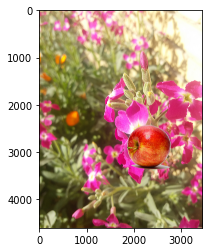

In [79]:
backgroundc = np.copy(background)
back_shape = np.shape(backgroundc)
apple_shape = np.shape( appleimagec)

y_center = int(back_shape[0]/2)
x_center = int(back_shape[1]/2)

# set image in backgroundimage
backgroundc[ y_center:y_center+apple_shape[0] , x_center:x_center+apple_shape[1] , : ] =\
 np.where(invert_mask == 0 , backgroundc[ y_center:y_center+apple_shape[0] , x_center:x_center+apple_shape[1] , : ], appleimagec)

plt.imshow(backgroundc)
